# Developing a Framework to Address Bias, Racism, and Sexism in Facial Recognition 

### Training a Convolutional Neural Network (CNN) to Recognize Multicultural Facial Expressions

![](./notebook_images/navarasa_banner.png)

**Image Notes:** 
  - Some of the image databases that I used do not permit me to share their image files. If you're running this notebook, [**START HERE --> Import image data**](#Import-image-data)._
  - Image credits are given where necessary

### CONTENTS
- [**Import Libraries**](#Import-Libraries)
- [**Image Preprocessing**](#Image-Pre-Processing)
 - [Detect Face and Crop](#Detect-Face-and-Crop)
 - [Resize images to 75 (width) by 110 (height) pixels](#Resize-images-to-75-(width)-by-110-(height)-pixels)
 - [Convert images to grayscale and numpy array](#Convert-images-to-grayscale-and-numpy-array)
 - [Combine image labels (rasas/emotions) into one array](#Combine-image-labels-(rasas/emotions)-into-one-array)
 - [Visualize images distribution per rasa (emotion)](#Visualize-images-distribution-per-rasa-(emotion))
 - [Preview images per rasa](#Preview-images-per-rasa)
- [**Preview predictor and target variables**](#Preview-predictor-and-target-variables)
 - [Predictor array (all image pixels)](#Predictor-array-(all-image-pixels))
 - [Target array (nine emotions)](#Target-array-(nine-emotions))
- [**Save image data to csv**](#Save-image-data-to-csv)
- [**START HERE --> Import image data**](#Import-image-data)
 - [Read in data as a csv, and convert to numpy array](#Read-in-data-as-a-csv,-and-convert-to-numpy-array)
 - [Visualize image pixels to make sure everything was processed correctly](#Visualize-image-pixels-to-make-sure-everything-was-processed-correctly)
- [**Train/Test Split**](#Train/Test-Split)
- [**Baseline Score**](#Baseline-Score)
- [**CNN Model 1**](#CNN-Model-1)
 - [Design Neural Network](#Design-Neural-Network)
   - [Compile the model](#Compile-the-model)
   - [Fit the model](#Fit-the-model-(Just-breathe-and-keep-scroll-past-this...))
 - [Save Weights](#Save-Weights)
 - [Visualize loss and accuracy over epoch](#Visualize-loss-and-accuracy-over-epoch)
 - [Baseline Score](#Baseline-Score)
 - [Model Summary](#Model-Summary)
- [**CNN Model 2: Data Augmentation**](#CNN-Model-2-Data-Augmentation)
 - [Preview data augmentation](#Preview-data-augmentation)
 - [Design Neural Network](#Design-Neural-Network)
   - [Set parameters for data augmentation](#Set-parameters-for-data-augmentation)
   - [Compile the model](#Compile-the-model)
   - [Fit the model](#Fit-the-model-(Just-breathe-and-keep-scroll-past-this...))
 - [Save Weights](#Save-Weights)
 - [Visualize loss and accuracy over epoch](#Visualize-loss-and-accuracy-over-epoch)
- [**CNN Model 3: VGG16**](#CNN-Model-3-VGG16)
 - [Pre-process data](#Pre-process-data)
   - [Convert grayscale arrays to RGB arrays](#Convert-grayscale-arrays-to-RGB-arrays)
   - [Set parameters for data augmentation](#Set-parameters-for-data-augmentation)
 - [Set up and run VGG model](#Set-up-and-run-VGG-model)
 - [Save Weights](#Save-Weights)
 - [Visualize loss and accuracy over epoch](#Visualize-loss-and-accuracy-over-epoch) 
 - [Model Summary](#Model-Summary)
- [**Make Predictions**](#Make-predictions!)
 - [Reverse changes made to testing data](#Reverse-changes-made-to-testing-data)
 - [Visualize prediction probabilities of rasas (emotions)](#Visualize-prediction-probabilities-of-rasas-(emotions))
 - [Predict vs Actual Visualization](#Predict-vs-Actual-Visualization)
 - [Confusion Matrix](#Confusion-Matrix)
- [**Conclusion and Next Steps**](#Conclusion-and-Next-Steps)

---

# Import Libraries

In [1]:
# Basic libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Modeling libraries 
from sklearn.model_selection import train_test_split

# Image-specific libraries 
from PIL import Image
import keras
from skimage.color import rgb2gray
from keras.utils import np_utils, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16

# Model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# For reproducibility
np.random.seed(2019)

%matplotlib inline

Using TensorFlow backend.


In [203]:
# Check keras version
import keras
keras.__version__

'2.1.5'

---

# Image Pre-Processing

Run these cells if you need to pre-process your images. Or, if you want to skip straight to working with these images as array, skip to [Import image data](#Import-image-data)

![image crop demo](./notebook_images/image-resize-demo.png/)

## Detect Face and Crop

Run the following code in terminal to detect faces and crop them from unedited photos. Source: https://pypi.org/project/autocrop/

`autocrop -i /images_directory -o /images/directory/crop  -r /images_directory/nofaces  -w 75 -H 110 --facePercent 70 --padUp 70 --padDown 70`

## Resize images to 75 (width) by 110 (height) pixels

For any images where the face was not auto-detected and cropped using the function above, this code will crop the rest of the images. 

In [2]:
# Function to resize images 
def resize_images(images_directory):
    for i, image in enumerate(os.listdir(images_directory)):
        if image == '.DS_Store':                             # Passes a hidden file called ".DS_Store"
            None
        else:
            image_dir = images_directory + '/' + image
            img = Image.open(image_dir)
            width, height = img.size                         # Stores image height and width as variables
           
            # Check if image is 75 x 110
            if (width == 75) & (height == 110):              # If images meet hxw requirement, pass
                None
            elif (width != 75) or (height != 110):
                img = img.resize((75,110))                   # Reshape images that are not 75 x 110 
                img.save(image_dir, optimize=True)           # Save image
    
    print(f'Your images have been scaled to 75x100!')       
# resize images: https://stackoverflow.com/questions/37631611/python-how-to-resize-an-image-using-pil-module

In [3]:
# Run the function on my images folders 
rasa_list = ['adbhuta', 'bibhatsa', 'bhayanaka', 'hasya', 'karuna', 'roudra', 'santa', 'srngara', 'veera'] 

for rasa in rasa_list:
    rasa_directory = './images/' + rasa
    resize_images(rasa_directory)

Your images have been scaled to 75x100!
Your images have been scaled to 75x100!
Your images have been scaled to 75x100!
Your images have been scaled to 75x100!
Your images have been scaled to 75x100!
Your images have been scaled to 75x100!
Your images have been scaled to 75x100!
Your images have been scaled to 75x100!
Your images have been scaled to 75x100!


## Convert images to grayscale and numpy array

In [4]:
# Function to convert images to grayscale and numpy array
def get_array(rasa, images_directory):
    array_list = []
    for image in os.listdir(images_directory):
        if image == '.DS_Store':                              # Passes a hidden file called ".DS_Store"
            None
        else:
            image_dir = images_directory + '/' + image
            img = Image.open(image_dir).convert('L')          # ('L') converts image to grayscale
            img.save(image_dir, optimize=True)   
         
    for image in os.listdir(images_directory):                
        if image.endswith(".jpg"):                             
            image_dir = images_directory + '/' + image    
            img = Image.open(image_dir)
            pix = np.array(img)                               # Converts image to numpy array
            array_list.append(pix)     
    print(f'{str(rasa)} shape: {np.stack(array_list).shape}')
    return np.stack(array_list) 

In [5]:
# Run function on all emotions.
adbhuta = get_array('adbhuta', './images/adbhuta')

bibhatsa = get_array('bibhatsa', './images/bibhatsa')

bhayanaka = get_array('bhayanaka', './images/bhayanaka')

hasya = get_array('hasya', './images/hasya')

karuna = get_array('karuna', './images/karuna')

roudra = get_array('roudra', './images/roudra')

santa = get_array('santa', './images/santa')

srngara = get_array('srngara', './images/srngara')

veera = get_array('veera', './images/veera')

adbhuta shape: (116, 110, 75)
bibhatsa shape: (112, 110, 75)
bhayanaka shape: (112, 110, 75)
hasya shape: (133, 110, 75)
karuna shape: (109, 110, 75)
roudra shape: (110, 110, 75)
santa shape: (111, 110, 75)
srngara shape: (121, 110, 75)
veera shape: (112, 110, 75)


## Combine image labels (rasas/emotions) into one array

In [6]:
# Create variable for all rasa (emotions) arrays
rasa_arrays = adbhuta, bibhatsa, bhayanaka, hasya, karuna, roudra, santa, srngara, veera

In [7]:
# Function to create labels array 
def map_emotions(emotions):
    lst = []
    for index, emotion in enumerate(emotions):
        for i in range(len(emotion)):
            lst.append(index)                     # Appends the same number to a list for each mention of a rasa
    
    stacked_array = np.stack(lst)                 # Creates one array with all image labels (numbers 0 - 8)
    print(f'There are {stacked_array.shape} images in this dataset!')
    return stacked_array

In [8]:
# Call function 
rasa_labels = map_emotions(rasa_arrays)
print("-"*40)
print(f'`rasa_labels` looks like this: {rasa_labels}')

There are (1036,) images in this dataset!
----------------------------------------
`rasa_labels` looks like this: [0 0 0 ... 8 8 8]


## Visualize images distribution per rasa (emotion)

In [9]:
# Convert array to DataFrame
rasa_labels_df = pd.DataFrame(rasa_labels, columns = ['rasas_labels'])

# Create named labels dictionary
rasas_dict = {0: 'adbhuta (astonishment)', 
              1: 'bibhatsa (disgust)', 
              2: 'bhayanaka (fear)', 
              3: 'hasya (joy)', 
              4: 'karuna (sorrow)', 
              5: 'roudra (anger)', 
              6: 'santa (peace)', 
              7: 'srngara (love)', 
              8: 'veera (confidence)'}

# Map rasas_dict to turn numbers to their rasa strings
rasa_labels_df['rasas_labels'] = rasa_labels_df['rasas_labels'].map(rasas_dict)

In [10]:
# Preview head
rasa_labels_df.head()

,rasas_labels
0,adbhuta (astonishment)
1,adbhuta (astonishment)
2,adbhuta (astonishment)
3,adbhuta (astonishment)
4,adbhuta (astonishment)


In [11]:
# Function to make bar plot
def bar_plot(x, y, title, color):    
    
    # Set up barplot 
    plt.figure(figsize=(9,5))
    g=sns.barplot(x, y, color = color)    
    ax=g

    # Label the graph
    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)

    # Code modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for p in ax.patches:
        totals.append(p.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for p in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=10)

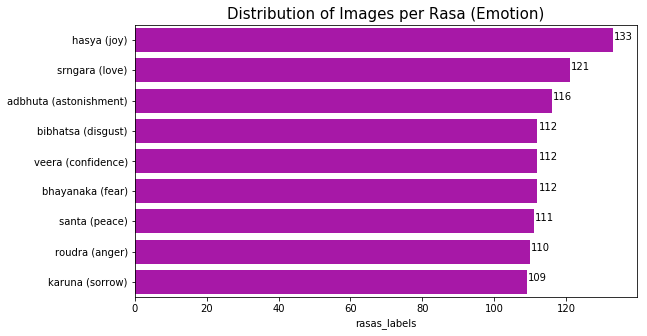

In [12]:
# Visualize position distribution
bar_plot(rasa_labels_df['rasas_labels'].value_counts(), 
         rasa_labels_df['rasas_labels'].value_counts().index, 
         "Distribution of Images per Rasa (Emotion)", 'm')

## Preview images per rasa

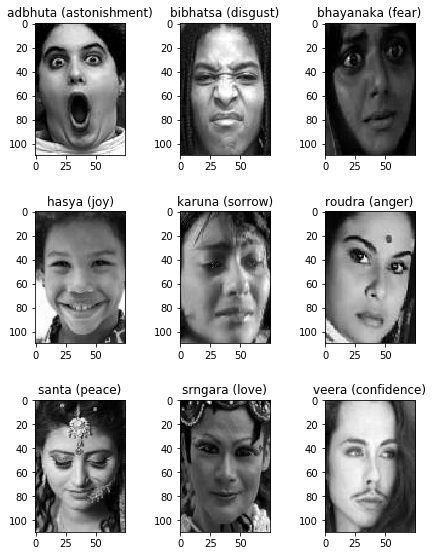

In [284]:
# Plot images
fig, axes = plt.subplots(3, 3, figsize=(6, 8))
ax = axes.ravel()

ax[0].imshow(adbhuta[53], cmap=plt.cm.gray)
ax[0].set_title("adbhuta (astonishment)")
ax[1].imshow(bibhatsa[54], cmap=plt.cm.gray)
ax[1].set_title("bibhatsa (disgust)")
ax[2].imshow(bhayanaka[57], cmap=plt.cm.gray)
ax[2].set_title("bhayanaka (fear)")
ax[3].imshow(hasya[1], cmap=plt.cm.gray)
ax[3].set_title("hasya (joy)")
ax[4].imshow(karuna[2], cmap=plt.cm.gray)
ax[4].set_title("karuna (sorrow)")
ax[5].imshow(roudra[1], cmap=plt.cm.gray)
ax[5].set_title("roudra (anger)")
ax[6].imshow(santa[10], cmap=plt.cm.gray)
ax[6].set_title("santa (peace)")
ax[7].imshow(srngara[101], cmap=plt.cm.gray)
ax[7].set_title("srngara (love)")
ax[8].imshow(veera[5], cmap=plt.cm.gray)
ax[8].set_title("veera (confidence)")

fig.tight_layout()
plt.show()

[Image source for "srngara" face](https://www.flickr.com/photos/tjook/4746803656/in/photolist-9XdG49-vcFh7S-62Lxcp-pZWg1t-ain93R-4pF4Tj-qVmc3t-nAdLsE-6AvFTU-eEBsvZ-oeP8XZ-8VQ7Mk-nSHdPx-Ji7CH-nQkN6k-8esBmm-bnJ5Xz-N3Wfum-WKbD95-q1eDgh-e7wfGD-iGsRxx-aHcyre-rBfkRk-az6phv-avEQh5-aipWsh-dNyWsX-XtizkB-jbhRuk-9rgG3b-nZ9ti4-YoYm6E-31Dnp-p4jisb-qouL-9JdMW-4pSazz-8NpcSZ-pHLuGS-8moqdb-dQGBn4-4BZ2ib-p4jivC-21X7AXj-9goFCZ-95nxEX-bo1c8t-bCumKj-q1eRpW)

<img src="./notebook_images/navarasas-art_.png" width="500" style="float: left">

# Preview predictor and target variables

## Predictor array (all image pixels)

In [14]:
# Concatenate all 9 individual emotion arrays into one array 
X = np.concatenate((rasa_arrays))
print("Shape of X array - image pixels", X.shape)
print("-"*40)
print("Sample shape of image", X[0].shape)

Shape of X array - image pixels (1036, 110, 75)
----------------------------------------
Sample shape of image (110, 75)


## Target array (nine emotions)

In [15]:
# Set y variable, emotion labels that correspond to the images
y = rasa_labels

# Count of labels 
len(y)

1036

# Save image data to csv
At this point, I'm prepping my data to be saved into a csv. If you're a new person reading this and you want to run this notebook, you can just upload the csv file and work directly with the image data that way. 

In [16]:
# Get pixel width for flattened image
pixels_flat = X.shape[1] * X.shape[2]
print(f'The pixel width, when flattened, is: {pixels_flat}')

The pixel width, when flattened, is: 8250


In [17]:
# Save image pixels to DataFrame, one row represents one image
image_pixels_df = pd.DataFrame(X.reshape(len(y), pixels_flat))

# Add labels column
image_pixels_df['rasa_num_labels'] = y

In [18]:
# Map rasas to numeric values 
image_pixels_df['rasas_string_labels'] = image_pixels_df['rasa_num_labels'].map(rasas_dict)

In [19]:
# Preview head
image_pixels_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,8242,8243,8244,8245,8246,8247,8248,8249,rasa_num_labels,rasas_string_labels
0,65,64,63,64,66,67,66,64,59,67,...,255,252,255,252,254,255,255,255,0,adbhuta (astonishment)
1,0,5,2,0,6,8,4,6,7,2,...,255,255,251,250,255,246,245,100,0,adbhuta (astonishment)
2,44,23,6,5,4,0,0,4,0,0,...,221,226,212,217,234,240,252,159,0,adbhuta (astonishment)


In [20]:
# Preview tail
image_pixels_df.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,8242,8243,8244,8245,8246,8247,8248,8249,rasa_num_labels,rasas_string_labels
1033,36,36,36,36,36,36,36,36,37,37,...,249,214,36,32,19,20,20,20,8,veera (confidence)
1034,236,236,236,236,236,236,236,236,241,236,...,99,93,91,102,116,148,152,158,8,veera (confidence)
1035,37,39,39,37,40,47,55,59,52,59,...,236,236,236,236,236,234,234,234,8,veera (confidence)


In [21]:
# Save image data to csv
image_pixels_df.to_csv('./data/image_pixels.csv')

---

# START HERE
# Import image data

## Read in data as a csv, and convert to numpy array

In [220]:
# Read in image data
image_data = pd.read_csv('./data/image_pixels.csv')

In [221]:
# Show shape of data
print(f'Shape: {image_data.shape}')
print(f'There are {image_data.shape[0]} images in this dataset!') 

Shape: (1036, 8253)
There are 1036 images in this dataset!


In [222]:
# Drop column in DataFrame
image_data.drop(columns=['Unnamed: 0'], inplace=True)

In [223]:
# Preview head
image_data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,8242,8243,8244,8245,8246,8247,8248,8249,rasa_num_labels,rasas_string_labels
0,65,64,63,64,66,67,66,64,59,67,...,255,252,255,252,254,255,255,255,0,adbhuta (astonishment)
1,0,5,2,0,6,8,4,6,7,2,...,255,255,251,250,255,246,245,100,0,adbhuta (astonishment)


In [224]:
# Create variable to hold only pixel data
pixels = [col for col in image_data.columns if (col != 'rasa_num_labels') &  (col != 'rasas_string_labels')]

In [225]:
# Convert DataFrame to array, and reshape array to 3D
X = image_data[pixels].values.reshape(image_data.shape[0], 110, 75)

# Check shape of X array 
print(f'The shape of the X array is: {X.shape}')

The shape of the X array is: (1036, 110, 75)


In [226]:
# Preview what `X` looks like. This is the first image in the dataset, with pixel range 0-255.
X[0]

array([[ 65,  64,  63, ...,  72,  72,  72],
       [ 64,  63,  62, ...,  72,  72,  72],
       [ 64,  63,  61, ...,  72,  72,  72],
       ...,
       [142, 141, 142, ..., 255, 255, 255],
       [156, 146, 141, ..., 255, 255, 255],
       [145, 133, 131, ..., 255, 255, 255]])

In [227]:
# Convert labels column to array
y = image_data['rasa_num_labels'].values

# Check shape of y array 
print(f'The shape of the y array is: {y.shape}')

The shape of the y array is: (1036,)


In [228]:
# Preview what `y` looks like. The first ten images have the rasa label "0", the last ten have the rasa label "8"
print(y[0:10])
print(y[1026:])

[0 0 0 0 0 0 0 0 0 0]
[8 8 8 8 8 8 8 8 8 8]


## Visualize image pixels to make sure everything was processed correctly

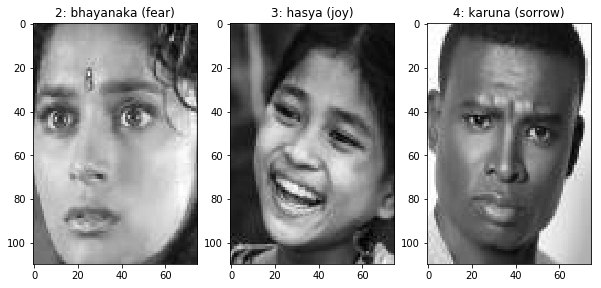

In [229]:
# Plot random images to check if images were processed correctly
fig, axes = plt.subplots(1, 3, figsize=(10, 8))
ax = axes.ravel()

ax[0].imshow(X[296], cmap=plt.cm.gray)
ax[0].set_title(f'{y[296]}: {image_data["rasas_string_labels"].loc[296]}')
ax[1].imshow(X[349], cmap=plt.cm.gray)
ax[1].set_title(f'{y[349]}: {image_data["rasas_string_labels"].loc[349]}')
ax[2].imshow(X[507], cmap=plt.cm.gray)
ax[2].set_title(f'{y[507]}: {image_data["rasas_string_labels"].loc[507]}');

# Train/Test Split

In [230]:
# Train/test split, and stratify y since this is a classification problem
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=2019, 
                                                    stratify=y)        # Stratify for classification problems

In [231]:
# An array of arrays. Each array is an individual image, each value is the value range of a pixel (0-255)
X_train[0]

array([[192, 192, 192, ..., 201, 201, 201],
       [192, 192, 192, ..., 201, 201, 201],
       [192, 192, 192, ..., 201, 201, 201],
       ...,
       [ 48,  48,  48, ...,  24,  24,  24],
       [ 48,  48,  48, ...,  24,  24,  24],
       [ 48,  48,  48, ...,  23,  23,  23]])

In [232]:
# Each image is 110 pixels by 75 pixels
print(f'Image dimensions: {X_train[0].shape}')

Image dimensions: (110, 75)


In [233]:
# Save a copy of these arrays before processing, so that I can use them later if needed to train more models
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [234]:
# Convert each value to a float, since we want to divide and get a percentage value.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# This scales each value to be between 0 and 1 (0 - 100%)
X_train /= 255
X_test /= 255

In [235]:
# Check scaled values
X_train[0][0]

array([0.7529412 , 0.7529412 , 0.7529412 , 0.7529412 , 0.7529412 ,
       0.7529412 , 0.7529412 , 0.7529412 , 0.75686276, 0.75686276,
       0.75686276, 0.75686276, 0.75686276, 0.75686276, 0.75686276,
       0.75686276, 0.76862746, 0.76862746, 0.76862746, 0.7647059 ,
       0.7647059 , 0.7647059 , 0.7607843 , 0.7607843 , 0.7372549 ,
       0.7411765 , 0.7529412 , 0.7647059 , 0.7607843 , 0.7529412 ,
       0.7607843 , 0.78039217, 0.75686276, 0.7607843 , 0.7607843 ,
       0.7490196 , 0.7294118 , 0.7254902 , 0.73333335, 0.7490196 ,
       0.7411765 , 0.77254903, 0.7921569 , 0.78039217, 0.7490196 ,
       0.7411765 , 0.7647059 , 0.7921569 , 0.78431374, 0.76862746,
       0.74509805, 0.74509805, 0.78039217, 0.8117647 , 0.79607844,
       0.7607843 , 0.7607843 , 0.76862746, 0.77254903, 0.77254903,
       0.7764706 , 0.78431374, 0.78431374, 0.7764706 , 0.78431374,
       0.78431374, 0.78431374, 0.7882353 , 0.7882353 , 0.7921569 ,
       0.7921569 , 0.7921569 , 0.7882353 , 0.7882353 , 0.78823

In [236]:
# Check shape
print(f'Shape of training set: {X_train.shape}')

# Check shape
print(f'Shape of testing set: {X_test.shape}')

Shape of training set: (777, 110, 75)
Shape of testing set: (259, 110, 75)


In [237]:
# Reshape images
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [238]:
# Check new reshape (making it show only one since X_train[0][0] shows a long list of arrays)
X_train[0][0][0]

array([0.7529412], dtype=float32)

In [239]:
# New shape of training set
print(f'New shape of training data: {X_train.shape}')

# New shape of training set
print(f'New shape of testing data: {X_test.shape}')

New shape of training data: (777, 110, 75, 1)
New shape of testing data: (259, 110, 75, 1)


In [240]:
# Show shape of y train
print(f'Shape of y_train: {y_train.shape}')

# Show shape of y test
print(f'Shape of y_test: {y_test.shape}')

Shape of y_train: (777,)
Shape of y_test: (259,)


In [241]:
# Preview of y labels
y_train[0:9]

array([0, 6, 6, 8, 5, 0, 6, 5, 3])

In [242]:
# Save a non-converted y_test for when I make predictions. I'll need it.
y_test_copy = y_test.copy() 

# Convert y to a categorical variable, 0-1 (0-100%)
y_train = np_utils.to_categorical(y_train, 9)
y_test = np_utils.to_categorical(y_test, 9)

In [243]:
# Check to see that changes were made, a preview of the first three image labels 
y_train[0:3]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [244]:
# Show shape of y train
print(f'Shape of reshaped y_train: {y_train.shape}')

# Show shape of y test
print(f'Shape of reshaped y_test: {y_test.shape}')

Shape of reshaped y_train: (777, 9)
Shape of reshaped y_test: (259, 9)


# Baseline Score

In [245]:
# Show total number of images per rasa in entire dataset
rasa_labels_df['rasas_labels'].value_counts(normalize=True)

hasya (joy)               0.128378
srngara (love)            0.116795
adbhuta (astonishment)    0.111969
bibhatsa (disgust)        0.108108
veera (confidence)        0.108108
bhayanaka (fear)          0.108108
santa (peace)             0.107143
roudra (anger)            0.106178
karuna (sorrow)           0.105212
Name: rasas_labels, dtype: float64

In [246]:
# Show class with the highest percentage
rasa_labels_df['rasas_labels'].value_counts(normalize=True)[[0]]

hasya (joy)    0.128378
Name: rasas_labels, dtype: float64

In [247]:
# Print statement to say what the baseline score is
baseline_score = round(rasa_labels_df['rasas_labels'].value_counts(normalize=True)[0],3)*100
print(f'My model must perform better than {baseline_score}% in order to predict more than just the plurality class.')

My model must perform better than 12.8% in order to predict more than just the plurality class.


# CNN Model 1

## Design Neural Network 

In [50]:
# Get count of unique labels in `y`
unique_elements, counts_elements = np.unique(y, return_counts=True)
output_neurons = len(unique_elements)
print(f'Unique target (`y`) variables for output layer: {output_neurons}')

Unique target (`y`) variables for output layer: 9


In [51]:
# Instantiate Convolutional Neural Network
cnn_model = Sequential()

# Add convolution layer 
cnn_model.add(Conv2D(filters=32,                     # Hyperparameter: Number of filters
                     kernel_size=(3,3),              # Hyperparameter: Filter dimensions
                     activation='relu',              # ReLu function, max{0, num}
                     input_shape=X_train[0].shape))  # Shape of the images                     
              
# Add pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2)))         # Hyperparameter: Takes maximum value of filter and records it in output

# Add convolution layer
cnn_model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
             
# Add pooling layer 
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Add convolution layer
cnn_model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
             
# Add pooling layer 
cnn_model.add(MaxPooling2D(pool_size = (2,2)))


# Add convolution layer
cnn_model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
             
# Add pooling layer 
cnn_model.add(MaxPooling2D(pool_size=(2,2)))


# Flatten layer to pass through dense layer
cnn_model.add(Flatten())

# Add dropout layer to avoid overfitting
cnn_model.add(Dropout(0.5))

# Add densely connected layer
cnn_model.add((Dense(512, activation='relu')))

# Output layer 
cnn_model.add(Dense(output_neurons,                  # Num of outputs (9 rasas)
                    activation='softmax'))           # Output activation that normalizes the probabilities from output neurons

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Compile the model

In [52]:
# Compile model
cnn_model.compile(loss='categorical_crossentropy',   # Loss function for multiclassification 
                  optimizer='adam',
                  metrics=['accuracy'])

### Fit the model (Just breathe and keep scroll past this...)

In [53]:
# Fit model on training data
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=64, 
                        validation_data=(X_test, y_test),
                        epochs=39,
                        verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 777 samples, validate on 259 samples
Epoch 1/39
777/777 [==============================] - 9s 12ms/step - loss: 2.2037 - acc: 0.1107 - val_loss: 2.1898 - val_acc: 0.1274
Epoch 2/39
777/777 [==============================] - 8s 11ms/step - loss: 2.1949 - acc: 0.1313 - val_loss: 2.1864 - val_acc: 0.1274
Epoch 3/39
777/777 [==============================] - 9s 11ms/step - loss: 2.1921 - acc: 0.1300 - val_loss: 2.1892 - val_acc: 0.1274
Epoch 4/39
777/777 [==============================] - 9s 12ms/step - loss: 2.1851 - acc: 0.1532 - val_loss: 2.1600 - val_acc: 0.1699
Epoch 5/39
777/777 [==============================] - 9s 11ms/step - loss: 2.1345 - acc: 0.1892 - val_loss: 2.0825 - val_acc: 0.1853
Epoch 6/39
777/777 [==============================] - 9s 11ms/step - loss: 2.0279 - acc: 0.2600 - val_loss: 1.9391 - val_acc: 0.3166
Epoch 7/39
777/777 [==============================] - 9s 12ms/step - loss: 1.8980 - acc: 0.3192 - val_loss: 

## Save weights

In [54]:
# Save model weights
cnn_model.save_weights('./data/navarasas_cnn_model_1.h5')  

## Visualize loss and accuracy over epoch

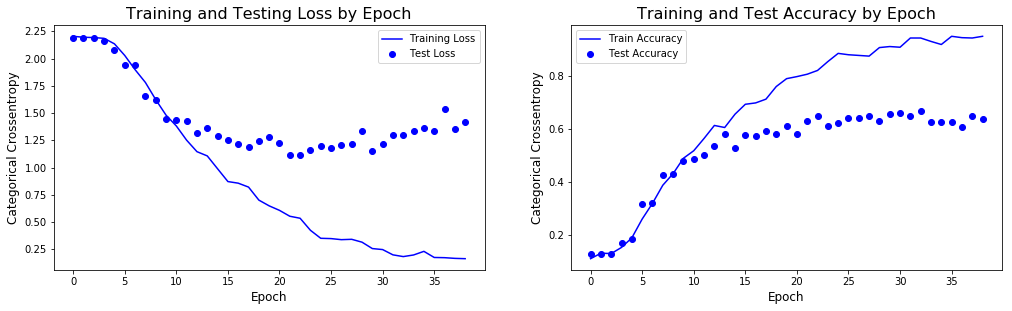

In [55]:
# Set parameters for subplot
fig, axes = plt.subplots(1, 2, figsize=(17, 4.5))
ax = axes.ravel()

# Plot loss over epochs
ax[0].plot(history.history['loss'], 'b', label='Training Loss')
ax[0].plot(history.history['val_loss'], 'bo', label='Test Loss')

# Set title
ax[0].set_title("Training and Testing Loss by Epoch", fontsize = 16)
ax[0].set_xlabel('Epoch', fontsize = 12)
ax[0].set_ylabel('Categorical Crossentropy', fontsize = 12)

# Set legend
ax[0].legend()

# Plot accuracy over epochs
ax[1].plot(history.history['acc'], 'b', label='Train Accuracy')
ax[1].plot(history.history['val_acc'], 'bo', label='Test Accuracy')

# Set title
ax[1].set_title("Training and Test Accuracy by Epoch", fontsize = 16)
ax[1].set_xlabel('Epoch', fontsize=12)
ax[1].set_ylabel('Categorical Crossentropy', fontsize=12)

# Set legend
ax[1].legend();

This model is overfit, since the training data performs better than the testing data. This makes sense considering that I'm training a CNN model on a small dataset. Next, I'll augment my data and see if that corrects my model.

## Model summary 

In [56]:
# Evaluate model on test data
cnn_score = cnn_model.evaluate(X_test,
                               y_test,
                               verbose=1)
# Save to variable
cnn_labels = cnn_model.metrics_names

print()

# Evaluate how model does
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')

print()

# Check out the model summary.
cnn_model.summary()

259/259 [==============================] - 1s 3ms/step

CNN loss  : 1.4188167298622574
CNN acc   : 0.637065637180704

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 108, 73, 32)       320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 7, 128)        0         
________________________

# CNN Model 2: Data Augmentation
Using `ImageDataGenerator`, augment image data by creating altered versions of each image to run through the model.

## Preview data augmentation

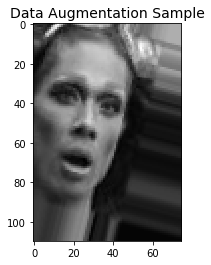

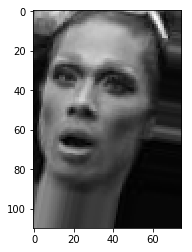

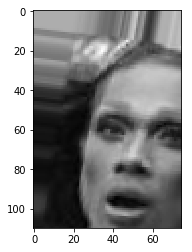

In [57]:
# Code modified from https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# Set parameters to modify images 
datagen = ImageDataGenerator(rotation_range=15,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             shear_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Sample one image from original dataset
x = X[40:41]

# Reshape it to (1, 110, 75, 1)
x = x.reshape(x.shape + (1,))

# The .flow() command below generates batches of randomly transformed images 
plt.title("Data Augmentation Sample", fontsize=14)
i = 0
for im in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(im[0]), cmap=plt.cm.gray)
    i += 1
    if i % 3 == 0:
        break
        
plt.show()

[Image Source](https://www.flickr.com/photos/istolethetv/14547691835/in/photolist-oawHX2-MoQjvg-6JGaA5-HYdVtW-q1eLJd-eAgHvG-p4ndog-q16Pjx-ZnewPd-pHFi3Z-eAeqyP-9UZu2w-7kq24n-aiTZTf-gqi1T-pHHmuy-kYe27-2LURLm-8VTg3Y-6p68bA-qovm-Kz3Xy-pHHreU-dYZZGa-AKSRe-8dVuHW-duDNw2-aiTZph-d6ekGm-WNRTKn-p4jiCS-7mTWPN-pHLAZw-eAigCL-q168Uv-a7DxQd-i2dZo4-nVizxY-6JBVbB-gp1Gm-HYdHD3-p4njnR-nQG9z5-asfFGj-62LwUH-hsFKq-4rTTJh-cKzJK5-pY1cDY-d6efmY)

## Design Neural Network 

In [58]:
# Instantiate Convolutional Neural Network
cnn_model_2 = Sequential()

# Add convolution layer 
cnn_model_2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=X_train[0].shape))                     
              
# Add pooling layer
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))      

# Add convolution layer
cnn_model_2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
             
# Add pooling layer 
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

# Add convolution layer
cnn_model_2.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
             
# Add pooling layer 
cnn_model_2.add(MaxPooling2D(pool_size = (2,2)))

# Add convolution layer
cnn_model_2.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
             
# Add pooling layer 
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer to pass through dense layer
cnn_model_2.add(Flatten())

# Add dropout layer to avoid overfitting
cnn_model_2.add(Dropout(0.5))

# Add densely connected layer
cnn_model_2.add((Dense(512, activation='relu')))

# Output layer 
cnn_model_2.add(Dense(output_neurons, activation='softmax'))


### Set parameters for data augmentation

In [59]:
# Set batch size 
batch_size = 64

# This is the augmentation configuration to use for training
train_datagen = ImageDataGenerator(rotation_range=15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Augment training data
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

# I don't need to do anything to my testing data since it's already been scaled

In [60]:
# Check shape of ImageDataGenerator images
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 110, 75, 1)
labels batch shape: (64, 9)


### Compile the model

In [61]:
# Compile model
cnn_model_2.compile(loss='categorical_crossentropy',    # Loss function for multiclassification 
                    optimizer='adam',
                    metrics=['accuracy'])

### Fit the model

In [62]:
# Fit the model on batches with real-time data augmentation
history_2 = cnn_model_2.fit_generator(train_generator, 
                                      steps_per_epoch=len(X_train) / 64, 
                                      epochs=100, 
                                      validation_data=(X_test, y_test))

Epoch 1/100
13/12 [================================] - 10s 759ms/step - loss: 2.2094 - acc: 0.0942 - val_loss: 2.1900 - val_acc: 0.1274
Epoch 2/100
13/12 [================================] - 9s 676ms/step - loss: 2.1998 - acc: 0.1063 - val_loss: 2.1921 - val_acc: 0.1274
Epoch 3/100
13/12 [================================] - 9s 667ms/step - loss: 2.1936 - acc: 0.1107 - val_loss: 2.1867 - val_acc: 0.1274
Epoch 4/100
13/12 [================================] - 9s 657ms/step - loss: 2.1896 - acc: 0.1344 - val_loss: 2.1801 - val_acc: 0.1274
Epoch 5/100
13/12 [================================] - 8s 637ms/step - loss: 2.1794 - acc: 0.1163 - val_loss: 2.1723 - val_acc: 0.1351
Epoch 6/100
13/12 [================================] - 9s 659ms/step - loss: 2.1732 - acc: 0.1534 - val_loss: 2.1509 - val_acc: 0.1429
Epoch 7/100
13/12 [================================] - 9s 657ms/step - loss: 2.1612 - acc: 0.1727 - val_loss: 2.1426 - val_acc: 0.1969
Epoch 8/100
13/12 [================================] -

## Save weights

In [63]:
# Save model weights
cnn_model_2.save_weights('./data/navarasas_data_aug_cnn_model_2.h5')  

## Visualize loss and accuracy over epoch

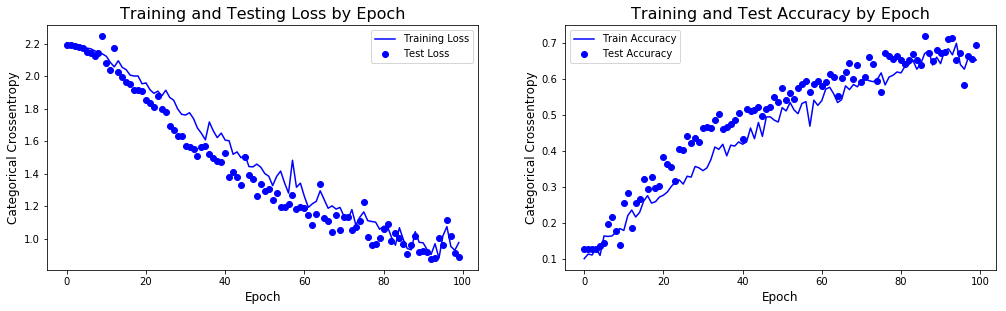

In [64]:
# Set parameters for subplot
fig, axes = plt.subplots(1, 2, figsize=(17, 4.5))
ax = axes.ravel()

# Plot Loss
# Generate line plot of training, testing loss over epochs.
ax[0].plot(history_2.history['loss'], 'b', label='Training Loss')
ax[0].plot(history_2.history['val_loss'], 'bo', label='Test Loss')

# Set title
ax[0].set_title("Training and Testing Loss by Epoch", fontsize = 16)
ax[0].set_xlabel('Epoch', fontsize = 12)
ax[0].set_ylabel('Categorical Crossentropy', fontsize = 12)

# Set legend
ax[0].legend()

# Plot Accuracy
# Generate line plot of training, testing loss over epochs.
ax[1].plot(history_2.history['acc'], 'b', label='Train Accuracy')
ax[1].plot(history_2.history['val_acc'], 'bo', label='Test Accuracy')

# Set title
ax[1].set_title("Training and Test Accuracy by Epoch", fontsize = 16)
ax[1].set_xlabel('Epoch', fontsize = 12)
ax[1].set_ylabel('Categorical Crossentropy', fontsize = 12)

# Set legend
ax[1].legend();

Data augmentation seems to have done the trick! My model is fit. Let's see if I can further enhance my model using the pre-trained `VGG16` model.

## Model summary 

In [65]:
# Evaluate model on test data.
cnn_score_2 = cnn_model_2.evaluate(X_test,
                                   y_test,
                                   verbose=1)

cnn_labels_2 = cnn_model_2.metrics_names

print()

# Evaluate how model does
print(f'CNN 1 {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN 1 {cnn_labels[1]}   : {cnn_score[1]}')

print()

print(f'CNN 2 {cnn_labels_2[0]}  : {cnn_score_2[0]}')
print(f'CNN 2 {cnn_labels_2[1]}   : {cnn_score_2[1]}')

print()

# Check out the model summary.
cnn_model_2.summary()

259/259 [==============================] - 1s 3ms/step

CNN 1 loss  : 1.4188167298622574
CNN 1 acc   : 0.637065637180704

CNN 2 loss  : 0.8861738962326271
CNN 2 acc   : 0.694980694980695

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 108, 73, 32)       320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (Max

# CNN Model 3: VGG16
`VGG16` is a pre-trained model by K. Simonyan and A. Zisserman (read more: University of Oxford, “Very Deep Convolutional Networks for Large-Scale Image Recognition”). It was trained on a dataset of ~14 million 224x224 images from ImageNet belonging to 1,000 classes. 

## Pre-process data
Since the `VGG16` model was trained on RGB images, I need to convert my grayscale to RGB images by manipulating my arrays.

### Convert grayscale arrays to RGB arrays

In [82]:
# Convert X_train from a grayscale array to an RGB array 
print(f'X_train grayscale shape: {X_train_copy.shape}')  
X_train_RGB = np.repeat(X_train_copy[..., np.newaxis], 3, -1)
print(f'X_train RGB shape: {X_train_RGB.shape}') 

X_train grayscale shape: (777, 110, 75)
X_train RGB shape: (777, 110, 75, 3)


In [83]:
# Convert X_test from a grayscale array to an RGB array 
print(f'X_test grayscale shape: {X_test_copy.shape}')  # (64, 224, 224)
X_test_RGB = np.repeat(X_test_copy[..., np.newaxis], 3, -1)
print(f'X_test RGB shape: {X_test_RGB.shape}') 

X_test grayscale shape: (259, 110, 75)
X_test RGB shape: (259, 110, 75, 3)


### Set parameters for data augmentation

In [94]:
# Set batch size 
batch_size = 64 

# This is the augmentation configuration we will use for training
train_datagen_aug = ImageDataGenerator(rotation_range=15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Augment training data
train_generator_aug = train_datagen_aug.flow(X_train_RGB, y_train, batch_size=batch_size)

In [95]:
# Check shape of ImageDataGenerator images
for data_batch, labels_batch in train_generator_aug:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 110, 75, 3)
labels batch shape: (64, 9)


## Set up  and run VGG model

In [96]:
# Load the model
vgg = VGG16(input_shape=(110, 75, 3),  # Specifying the weights in my dataset 
            include_top=False)         # Doesn't include the densely connected classifier on top of the network

RILEY: more neurons, more hypotheses, could try 512, get rid of dropout, goal is overfit, once i overfit, then regularize.
one of the issues, this one is not doing well, put greyscale images into rgb. giving it grayscale. 
startover, use color images as original dataset. 
get test predictions into a confusion matrix

In [97]:
# Create the model
cnn_model_3 = Sequential()
 
# Add the VGG16 convolutional base model
cnn_model_3.add(vgg)
 
# Add new layers
cnn_model_3.add(Flatten())
cnn_model_3.add(Dense(256, activation='relu'))
cnn_model_3.add(Dropout(0.5))
cnn_model_3.add(Dense(output_neurons, activation='softmax'))

In [98]:
cnn_model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 2, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               786688    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 9)                 2313      
Total params: 15,503,689
Trainable params: 15,503,689
Non-trainable params: 0
_________________________________________________________________


In [99]:
print(f'This is the number of trainable weights before freezing the conv base: {len(cnn_model_3.trainable_weights)}')

This is the number of trainable weights before freezing the conv base: 30


In [100]:
# Freeze network to prevent weights from being updated during training
vgg.trainable = False

In [101]:
print(f'This is the number of trainable weights after freezing the conv base: {len(cnn_model_3.trainable_weights)}')

This is the number of trainable weights after freezing the conv base: 4


In [102]:
# Compile model
cnn_model_3.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

In [103]:
# Fit the model on batches with real-time data augmentation
history_3 = cnn_model_3.fit_generator(train_generator_aug, 
                                      steps_per_epoch=100, 
                                      epochs=30, 
                                      validation_data=(X_test_RGB, y_test), 
                                      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 396s 4s/step - loss: 6.3644 - acc: 0.2755 - val_loss: 2.0606 - val_acc: 0.2780
Epoch 2/30
100/100 [==============================] - 418s 4s/step - loss: 2.0395 - acc: 0.3166 - val_loss: 1.8558 - val_acc: 0.3514
Epoch 3/30
100/100 [==============================] - 397s 4s/step - loss: 1.8209 - acc: 0.3785 - val_loss: 1.7064 - val_acc: 0.3938
Epoch 4/30
100/100 [==============================] - 407s 4s/step - loss: 1.6941 - acc: 0.4148 - val_loss: 1.5753 - val_acc: 0.4788
Epoch 5/30
100/100 [==============================] - 408s 4s/step - loss: 1.6351 - acc: 0.4403 - val_loss: 1.4964 - val_acc: 0.4672
Epoch 6/30
100/100 [==============================] - 399s 4s/step - loss: 1.5506 - acc: 0.4660 - val_loss: 1.5515 - val_acc: 0.4826
Epoch 7/30
100/100 [==============================] - 410s 4s/step - loss: 1.4719 - acc: 0.4734 - val_loss: 1.4703 - val_acc: 0.4942
Epoch 8/30
100/100 [==============================] - 388s 4s/step - 

## Save weights

In [104]:
# Save model weights
cnn_model_3.save_weights('./data/navarasas_data_vgg_cnn_model_3.h5')  

## Visualize loss and accuracy over epoch

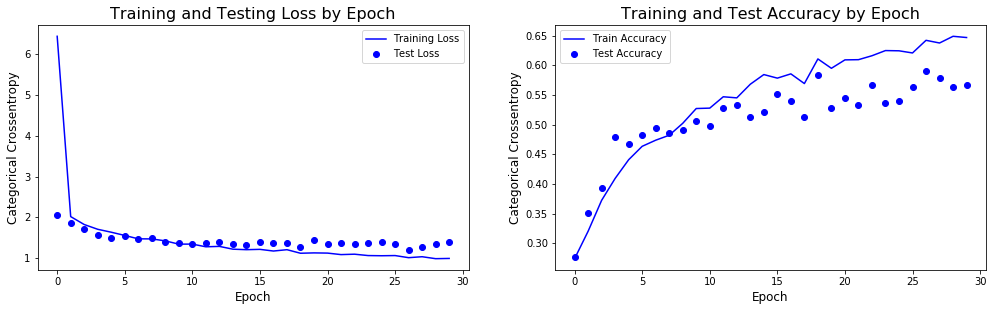

In [105]:
# Set parameters for subplot
fig, axes = plt.subplots(1, 2, figsize=(17, 4.5))
ax = axes.ravel()

# Plot loss over epoch
ax[0].plot(history_3.history['loss'], 'b', label='Training Loss')
ax[0].plot(history_3.history['val_loss'], 'bo', label='Test Loss')

# Set title
ax[0].set_title("Training and Testing Loss by Epoch", fontsize = 16)
ax[0].set_xlabel('Epoch', fontsize = 12)
ax[0].set_ylabel('Categorical Crossentropy', fontsize = 12)

# Set legend
ax[0].legend()

# Plot accuracy over epoch
ax[1].plot(history_3.history['acc'], 'b', label='Train Accuracy')
ax[1].plot(history_3.history['val_acc'], 'bo', label='Test Accuracy')

# Set title
ax[1].set_title("Training and Test Accuracy by Epoch", fontsize = 16)
ax[1].set_xlabel('Epoch', fontsize = 12)
ax[1].set_ylabel('Categorical Crossentropy', fontsize = 12)

# Set legend
ax[1].legend();

## Model summary

In [106]:
# Evaluate model on test data.
cnn_score_3 = cnn_model_3.evaluate(X_test_RGB,
                                   y_test,
                                   verbose=1)

cnn_labels_3 = cnn_model_3.metrics_names

print()

# Evaluate how model does
print(f'CNN 1 {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN 1 {cnn_labels[1]}   : {cnn_score[1]}')

print()

print(f'CNN 2 {cnn_labels_2[0]}  : {cnn_score_2[0]}')
print(f'CNN 2 {cnn_labels_2[1]}   : {cnn_score_2[1]}')

print()

print(f'CNN 3 {cnn_labels_3[0]}  : {cnn_score_3[0]}')
print(f'CNN 3 {cnn_labels_3[1]}   : {cnn_score_3[1]}')

print()

# Check out the model summary.
cnn_model_3.summary()

259/259 [==============================] - 15s 59ms/step

CNN 1 loss  : 1.4188167298622574
CNN 1 acc   : 0.637065637180704

CNN 2 loss  : 0.8861738962326271
CNN 2 acc   : 0.694980694980695

CNN 3 loss  : 1.406147675164418
CNN 3 acc   : 0.5675675677977013

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 2, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               786688    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 9)                 2313      
Total params: 15,5

# Make predictions!

## Reverse changes made to testing data

In [248]:
# Reset variables 
X_test_1 = X_test.copy()

# Undo scale to convert pixels from 0-1 range to 0-255 range
X_test_1 *= 255

# Reshape the X_test since I only need to make predictions on the testing data, not the training data
X_test_1 = X_test_1.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Show shape of reshaped X_test_1
print(f'Shape of X_test_1: {X_test_1.shape}')

Shape of X_test_1: (259, 110, 75)


In [249]:
# Check X_test_1 to see if it's been converted back to pixel range 0-255
X_test_1[0]

array([[ 14.,  14.,  13., ...,  31.,  31.,  31.],
       [ 15.,  14.,  14., ...,  35.,  35.,  35.],
       [ 15.,  15.,  14., ...,  37.,  37.,  37.],
       ...,
       [ 19.,  41., 115., ...,  24.,  33.,  40.],
       [ 25.,  32., 105., ...,  22.,  31.,  38.],
       [ 30.,  25.,  98., ...,  21.,  30.,  37.]], dtype=float32)

In [250]:
# Get predicted classes from unaltered X_test
pred_labels = cnn_model_2.predict_classes(X_test)

# Show preview of predicted labels (labels correspond to the nine emotions)
pred_labels[20:30]

array([4, 5, 8, 8, 7, 7, 8, 6, 8, 5])

In [251]:
# Convert numbers to associated rasa (emotion)
pred_labels = np.vectorize(rasas_dict.get)(pred_labels)
pred_labels[20:30]

array(['karuna (sorrow)', 'roudra (anger)', 'veera (confidence)',
       'veera (confidence)', 'srngara (love)', 'srngara (love)',
       'veera (confidence)', 'santa (peace)', 'veera (confidence)',
       'roudra (anger)'], dtype='<U22')

In [252]:
# Preview y_test labels
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [253]:
# Convert y_test to DataFrame to make it easy to reference the original class of the image
y_test_df = pd.DataFrame(y_test, columns=[list(rasas_dict.values())])

In [254]:
# Preview dataframe
y_test_df.tail()

,adbhuta (astonishment),bibhatsa (disgust),bhayanaka (fear),hasya (joy),karuna (sorrow),roudra (anger),santa (peace),srngara (love),veera (confidence)
254,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
256,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
258,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [255]:
# Assign variable to hold all prediction probability results
prediction_proba_array = cnn_model_2.predict(X_test)

In [256]:
# Preview the array. This shows the probabilities that the CNN model predicted for each of the 9 emotions
prediction_proba_array[0]

array([1.16300516e-01, 3.89010622e-03, 1.90278053e-01, 2.06851951e-06,
       4.33015563e-02, 5.61916113e-01, 3.38311679e-06, 4.64118924e-03,
       7.96669796e-02], dtype=float32)

## Visualize prediction probabilities of rasas (emotions)

In [257]:
# Function to graph image and probability of predictions
def show_prediction_proba(n):
    fig, axes = plt.subplots(1, 2, figsize=(8,4))
    fig.subplots_adjust(wspace=.5)
    ax = axes.ravel()
    
    # Plot image
    ax[0].imshow(X_test_1[n], cmap=plt.cm.gray)
    
    # Set image plot title to the actual label
    ax[0].set_title(f'Actual: {y_test_df.loc[n].idxmax()}', size=13)
    
    # Plot predicted probabilities distribution
    ax[1].barh(rasa_list, prediction_proba_array[n], color='pink')
    
    # Set distribution plot title to predicted label
    ax[1].set_title(f'Predicted: {pred_labels[n]}', size=13); 

The following image and probability comparisons show what the image and actual emotion is, compared to the predicted emotion is and the probabilities of each emotion that the CNN model detected on the face. You'll see that some images have a high probability of one or two emotions, while others have a wide ranging distribution of predicted emotions. 

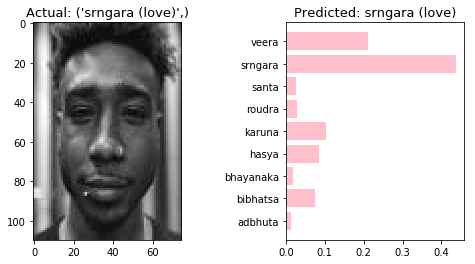

In [258]:
show_prediction_proba(10)

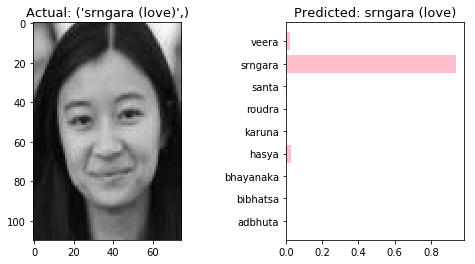

In [259]:
show_prediction_proba(107)

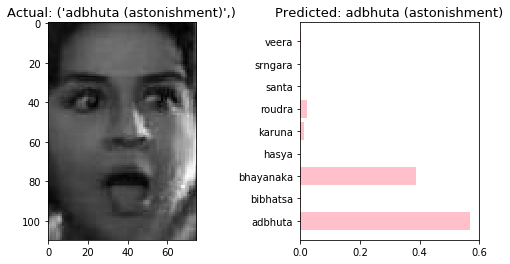

In [260]:
show_prediction_proba(15)

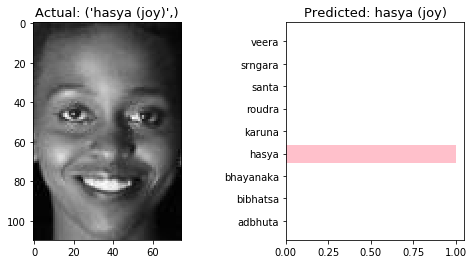

In [261]:
show_prediction_proba(78)

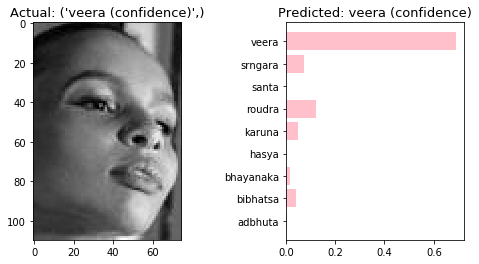

In [286]:
show_prediction_proba(105)

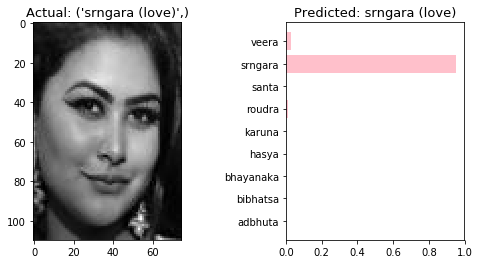

In [299]:
show_prediction_proba(230)

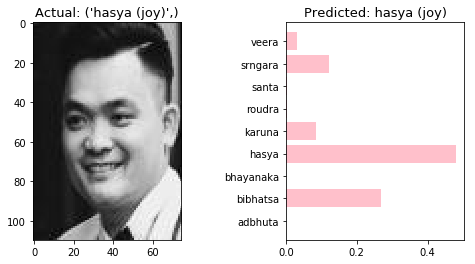

In [300]:
show_prediction_proba(2)

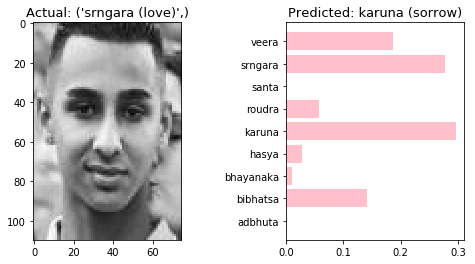

In [265]:
show_prediction_proba(249)

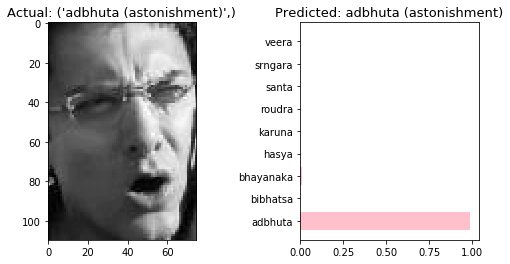

In [304]:
show_prediction_proba(256)

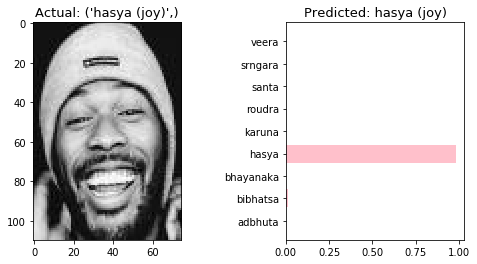

In [267]:
show_prediction_proba(70)

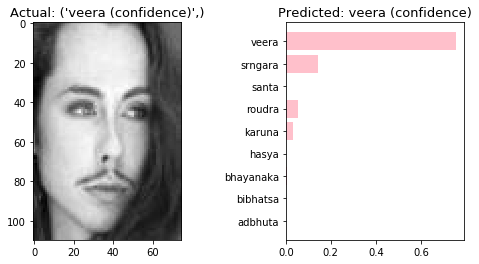

In [268]:
show_prediction_proba(26)

## Predict vs Actual Visualization

In [269]:
# Set variables for actual values
y_test_actual = pd.DataFrame(y_test_copy, columns = ['rasas'])

# Set variables for predicted values
y_test_pred = pd.DataFrame(pred_labels, columns = ['rasas'])

In [270]:
print(f'These are the actual labels of the test dataset')
# Preview dataframe
y_test_actual.head()

These are the actual labels of the test dataset


,rasas
0,5
1,5
2,3
3,1
4,3


In [271]:
print(f'These are the predicted labels of the test dataset')
# Preview dataframe
y_test_pred.head()

These are the predicted labels of the test dataset


,rasas
0,roudra (anger)
1,karuna (sorrow)
2,hasya (joy)
3,roudra (anger)
4,hasya (joy)


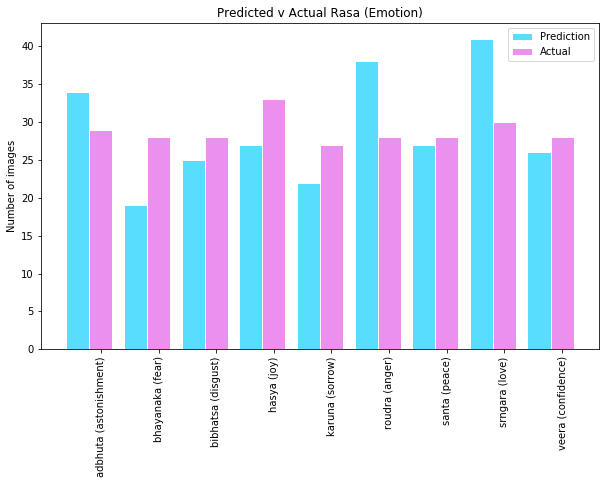

In [272]:
# Code modified from https://python-graph-gallery.com/11-grouped-barplot/

# Plot size, title
plt.figure(figsize=(10, 6))
plt.title("Predicted v Actual Rasa (Emotion)")

# Bar width
barWidth = 0.4
 
# Bar height
bars_pred = list(y_test_pred['rasas'].value_counts().sort_index())
bars_act = list(y_test_actual['rasas'].map(rasas_dict).value_counts().sort_index())
 
# Set position of bar on X axis
r1 = np.arange(len(bars_pred))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars_pred, color='#59ddff', width=barWidth, edgecolor='white', label='Prediction')
plt.bar(r2, bars_act, color='#eb90ed', width=barWidth, edgecolor='white', label='Actual')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars_act))], list(y_test_pred['rasas'].value_counts().sort_index().index), rotation=90)
plt.ylabel("Number of images") 
    
# Create legend & Show graphic
plt.legend()
plt.show()


This is a distribution of predicted versus actual labels. The CNN model #2 was tended to predict srngara (love) and roudra (anger).

## Confusion Matrix

In [273]:
# Map emotion strings to labels
y_test_actual['labels'] = y_test_actual['rasas'].map(rasas_dict)

# Preview dataframe
y_test_actual.head()

,rasas,labels
0,5,roudra (anger)
1,5,roudra (anger)
2,3,hasya (joy)
3,1,bibhatsa (disgust)
4,3,hasya (joy)


In [156]:
# Create a confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test_actual['labels'], y_test_pred)
cnf_matrix

array([[23,  3,  0,  0,  0,  3,  0,  0,  0],
       [ 6, 12,  0,  0,  0,  8,  1,  0,  1],
       [ 1,  0, 18,  0,  1,  2,  1,  3,  2],
       [ 0,  1,  2, 26,  0,  0,  0,  3,  1],
       [ 0,  1,  3,  0, 17,  2,  0,  2,  2],
       [ 2,  1,  0,  0,  2, 19,  0,  2,  2],
       [ 0,  0,  1,  0,  1,  0, 25,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0, 26,  3],
       [ 2,  1,  1,  1,  0,  4,  0,  5, 14]])

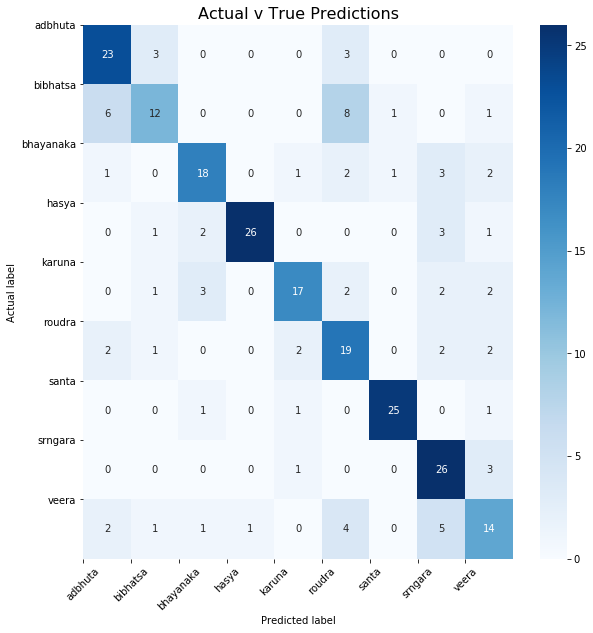

In [161]:
# Set fig and axes to visualize confusion matrix
fig, ax = plt.subplots(figsize=(8,8))
ticks = np.arange(len(rasa_list))

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Actual v True Predictions', fontsize=16)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(ticks, rasa_list, rotation=45)
plt.yticks(ticks, rasa_list, rotation=360);

The model tended to confuse the following emotions with each other: 
  - bibhatsa (disgust) and adbhuta (astonishment)
  - srngara (love) and veera (confidence)
  - roudra (anger) and bibhatsa (disgust)

# Conclusion and Next Steps

Working on this project was challenging and exhilarating at the same time. I was surprised at the results of my model considering the small dataset and lack of distinct facial expressions belonging to the nine categories. This project can be used as a starting point to expand this project into something bigger. I hope to contribute my skills as a data scientist and researcher to the larger movement of building more inclusive and equitable AI algorithms. 